In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [2]:
#reading data
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

In [3]:
#exploring the data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### looking at the data we can tell that there are 3 attributes that won't help with our analysis which are('Name, PassengerId, Ticket)

In [6]:
#detecting missing values
total= train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1,1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total','%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


C:\Users\essam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Male')

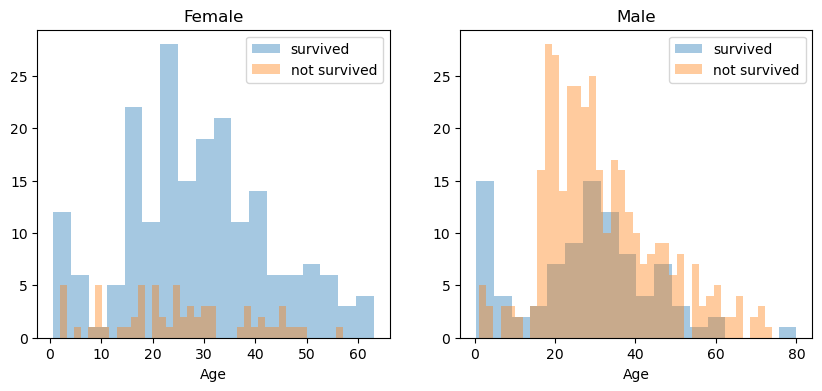

In [7]:
#exploring the relation between Age and sex with the survival
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

C:\Users\essam\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


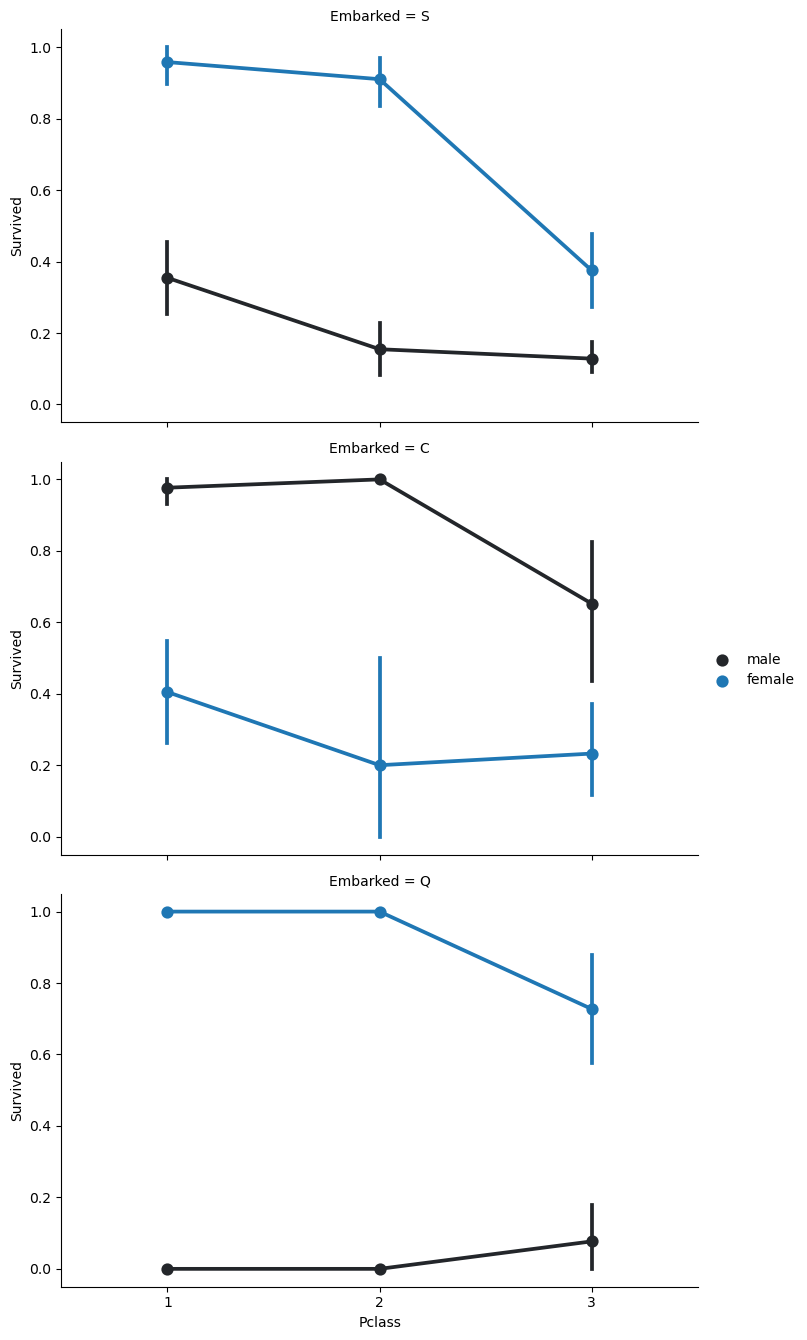

In [8]:
#Embark, Pclass, and Sex relation to the survival rate
FacetGrid= sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None, order=None, hue_order=None)
FacetGrid.add_legend()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

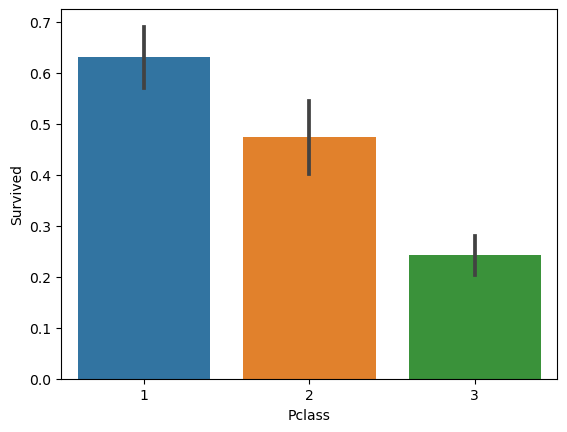

In [9]:
#exploring Pclass relation with survival
sns.barplot(x='Pclass', y='Survived', data= train_df)

### As we see the ticket class strongly affects your chances of survival

C:\Users\essam\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


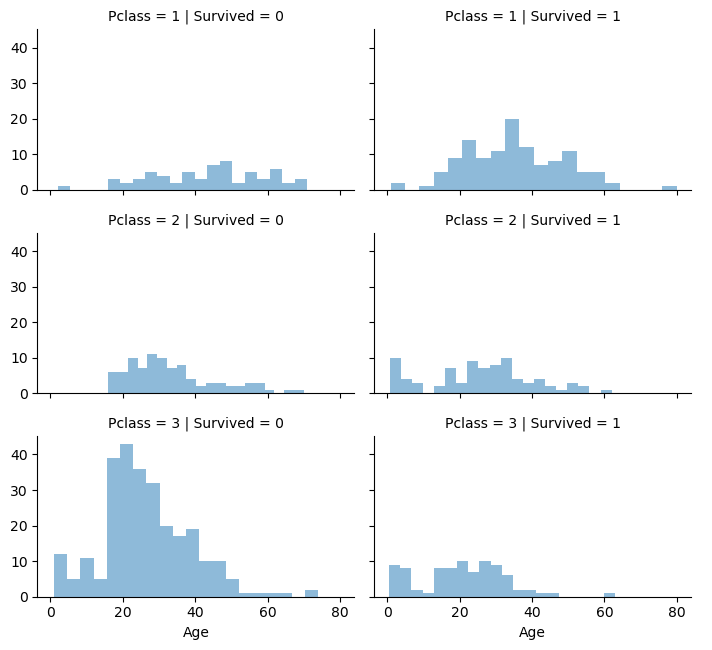

In [10]:
grid= sns.FacetGrid(train_df, col='Survived',row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist,'Age', alpha=0.5, bins=20)
grid.add_legend()

Another plot confirming the assumptions about pclass 1

In [11]:
#combining SibSp and Parch as one feature
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

C:\Users\essam\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\essam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


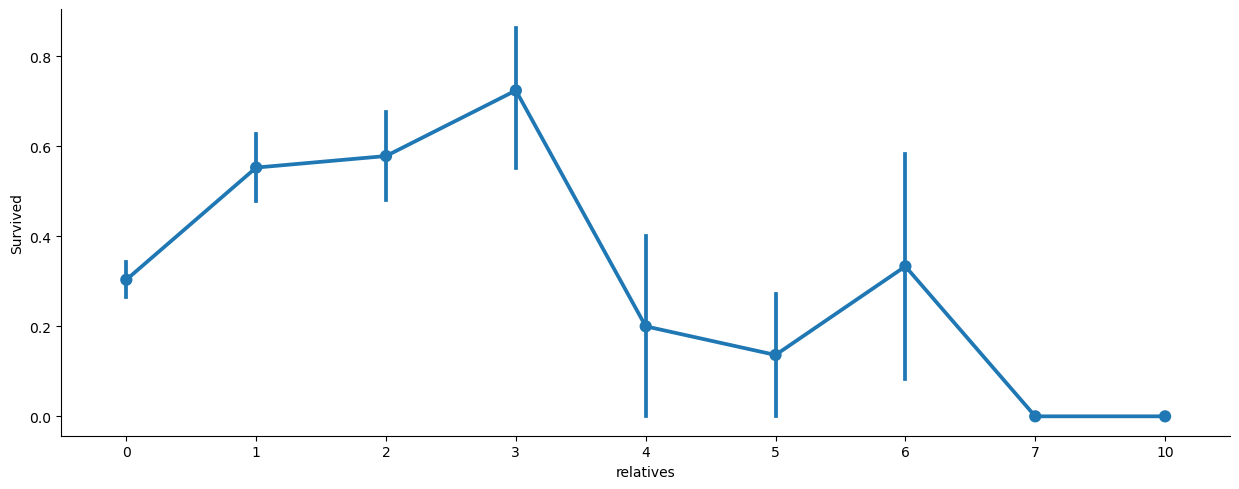

In [12]:
axes = sns.factorplot('relatives', 'Survived', data= train_df, aspect=2.5)

Here we can see that you had a high probabilty of survival with 1 to 3 realitves, but a lower one if you had less than 1 or more than 3 (except for some cases with 6 relatives).

In [13]:
#Data PreProcessing
train_df= train_df.drop(['PassengerId'], axis=1)

In [14]:
train_df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

cabin number looks like ‘C123’ and the letter refers to the deck. Therefore we’re going to extract these and create a new feature, that contains a persons deck. Afterwords we will convert the feature into a numeric variable. The missing values will be converted to zero

In [15]:
#dealing with missing data(Cabin)
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

In [18]:
for dataset in data:
    dataset= dataset.drop(['Cabin'], axis=1, inplace=True)

In [19]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,8


In [20]:
#dealing with missing values(Age)
for dataset in data:
    mean= dataset['Age'].mean()
    std= test_df['Age'].std()
    is_null= dataset['Age'].isnull().sum()
    rand_age= np.random.randint(mean- std, mean + std, size= is_null)
    age_slice= dataset['Age'].copy()
    age_slice[np.isnan(age_slice)]= rand_age
    dataset['Age']= age_slice
    dataset['Age']= train_df['Age'].astype(int)
train_df['Age'].isnull().sum()

0

In [21]:
#dealing with missing values(Embarked)
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [22]:
common_value= 'S'
for dataset in data:
    dataset['Embarked']= dataset['Embarked'].fillna(common_value)

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int32  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int32  
 12  Deck       891 non-null    int32  
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.2+ KB


In [24]:
#modyfiying data types(Fare)
for dataset in data:
    dataset['Fare']= dataset['Fare'].fillna(0)
    dataset['Fare']= dataset['Fare'].astype(int)

In [25]:
#extracting titles from names
titles={'Mr':1, 'Miss':2,'Mrs':3, 'Master':4, 'Rare':5}
for dataset in data:
    dataset['Title']= dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
    dataset['Title']= dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Johnkeer','Dona'],'Rare')
    dataset['Title']= dataset['Title'].replace('Mlle','Miss')
    dataset['Title']= dataset['Title'].replace('Ms','Miss')
    dataset['Title']= dataset['Title'].replace('Mme','Miss')
    dataset['Title']= dataset['Title'].map(titles)
    dataset['Title']= dataset['Title'].fillna(0)
train_df= train_df.drop(['Name'], axis=1)
test_df= test_df.drop(['Name'], axis=1)

In [38]:
#Convert Sex into numeric value
genders= {'male':0, 'female':1}
for dataset in data:
    dataset['Sex']= dataset['Sex'].map({'male':0, 'female':1})

In [28]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

the ticket attribute has 681 unique types of tickets so we won't be able to convert it into categories so we drop the whole column

In [29]:
train_df.dtypes

Survived       int64
Pclass         int64
Sex           object
Age            int32
SibSp          int64
Parch          int64
Ticket        object
Fare           int32
Embarked      object
relatives      int64
not_alone      int32
Deck           int32
Title        float64
dtype: object

In [30]:
train_df= train_df.drop(['Ticket'],axis=1)
test_df= test_df.drop(['Ticket'], axis=1)

In [43]:
#converting embarked feature into numeric values
ports= {'S':1,'C':2, 'Q':3}
for dataset in data:
    dataset['Embarked']= dataset['Embarked'].map(ports)

In [32]:
#categorizing age into pins
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 7

# let's see how it's distributed 
train_df['Age'].value_counts()

4    159
6    159
5    144
3    136
2    125
1     93
0     68
7      7
Name: Age, dtype: int64

In [44]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,5,1,1,0,8,1.0,6,2
1,1,1,1,5,1,0,5,2,1,0,3,3.0,5,2
2,1,3,1,3,0,0,5,1,0,1,8,2.0,9,5
3,1,1,1,5,1,0,5,1,1,0,3,3.0,5,2
4,0,3,0,5,0,0,5,1,0,1,8,1.0,15,5


In [34]:
#categorizing Fare into groups
for dataset in data:
    dataset['Fare']= dataset['Fare'].astype(int)
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare']> 7.91) & (dataset['Fare'] <= 14.454), 'Fare']= 1
    dataset.loc[(dataset['Fare']> 14.454) & (dataset['Fare'] <= 31), 'Fare']= 2
    dataset.loc[(dataset['Fare']> 31) & (dataset['Fare'] <= 99), 'Fare']= 3
    dataset.loc[(dataset['Fare']> 99) & (dataset['Fare'] <= 250), 'Fare']= 4
    dataset.loc[dataset['Fare'] <= 250, 'Fare'] = 5

In [35]:
#Creating new features that is computed out of other features
#NO.1 Age times Class
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [36]:
#NO.2 Fare per Person
for dataset in data:
    dataset['Fare_Per_Person']= dataset['Fare']/ (dataset['relatives']+1)
    dataset['Fare_Per_Person']= dataset['Fare_Per_Person'].astype(int)

In [46]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,5,1,1,0,8,1.0,6,2
1,1,1,1,5,1,0,5,2,1,0,3,3.0,5,2
2,1,3,1,3,0,0,5,1,0,1,8,2.0,9,5
3,1,1,1,5,1,0,5,1,1,0,3,3.0,5,2
4,0,3,0,5,0,0,5,1,0,1,8,1.0,15,5
5,0,3,0,4,0,0,5,3,0,1,8,1.0,12,5
6,0,1,0,6,0,0,5,1,0,1,5,1.0,6,5
7,0,3,0,0,3,1,5,1,4,0,8,4.0,0,1
8,1,3,1,3,0,2,5,1,2,0,8,3.0,9,1
9,1,2,1,1,1,0,5,2,1,0,8,3.0,2,2


In [47]:
#Bulding machine learning models
X_train= train_df.drop('Survived', axis=1)
Y_train= train_df['Survived']
X_test= test_df.drop('PassengerId', axis=1).copy()

Stochastic Gradient Descent (SGD):

In [48]:
sgd= linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred= sgd.predict(X_test)
acc_sgd= round(sgd.score(X_train, Y_train)*100, 2)

Random Forest:

In [64]:
random_forest= RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,Y_train)
Y_prediction= random_forest.predict(X_test)
random_forest.score(X_train,Y_train)
acc_random_forest= round(random_forest.score(X_train, Y_train)*100,2)

Logistic Regression:

In [51]:
logreg= LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred= logreg.predict(X_test)
acc_log= round(logreg.score(X_train, Y_train)*100,2)

C:\Users\essam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


K Nearest Neighbor:

In [52]:
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred= knn.predict(X_test)
acc_knn= round(knn.score(X_train, Y_train)*100,2)

C:\Users\essam\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\essam\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Gaussian Naive Bayes:

In [53]:
gaussain = GaussianNB()
gaussain.fit(X_train, Y_train)
Y_pred= gaussain.predict(X_test)
acc_gaussian= round(gaussain.score(X_train, Y_train)*100, 2)

Preceptron:

In [55]:
perceptron = Perceptron(max_iter= 5)
perceptron.fit(X_train, Y_train)
Y_pred= perceptron.predict(X_test)
acc_perceptron= round(perceptron.score(X_train, Y_train)*100,2)

C:\Users\essam\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Linear Support Vector Machine:

In [57]:
linear_svc= SVC()
linear_svc.fit(X_train, Y_train)
Y_pred= linear_svc.predict(X_test)
acc_linear_svc= round(linear_svc.score(X_train, Y_train)*100,2)

Decision Tree:

In [58]:
decision_tree= DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred= decision_tree.predict(X_test)
acc_decision_tree= round(decision_tree.score(X_train, Y_train)*100,2)

#### let's combine the results of every model and see which is the best for our data

In [65]:
results = pd.DataFrame({'Model':['Stochastic Gradient Descent','Random Forest','Logistic Regression','K Nearest Neighbor', 'Gaussian Naive Bayes','Perceptron','Support Vector Machine','Decision Tree'], 'Score':[acc_sgd, acc_random_forest, acc_log, acc_knn, acc_gaussian, acc_perceptron, acc_linear_svc, acc_decision_tree]})

In [66]:
results_df= results.sort_values(by='Score',ascending=False)
results_df= results_df.set_index('Score')
results_df

,Model
Score,
90.57,Random Forest
90.57,Decision Tree
86.53,K Nearest Neighbor
81.37,Logistic Regression
79.46,Perceptron
73.85,Gaussian Naive Bayes
69.47,Stochastic Gradient Descent
69.02,Support Vector Machine


As we can see, the Random Forest classifier goes on the first place. But first, let us check, how random-forest performs, when we use cross validation.

In [67]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores= cross_val_score(rf, X_train, Y_train, cv=10, scoring='accuracy')
print('Scores:', scores)
print('Mean:',scores.mean())
print('Standard Deviation:', scores.std())

Scores: [0.77777778 0.7752809  0.76404494 0.83146067 0.84269663 0.78651685
 0.80898876 0.75280899 0.87640449 0.82022472]
Mean: 0.8036204744069912
Standard Deviation: 0.03716933638625648


#### This looks much more realistic than before. Our model has a average accuracy of 82% with a standard deviation of 4 %. The standard deviation shows us, how precise the estimates are .

In [77]:
# Feature Importance( an advantage of Random Forest Classifier)
importances= pd.DataFrame({'feature': X_test.columns , 'importance':np.round(random_forest.feature_importances_,3)})
importances= importances.sort_values(by='importance', ascending=False).set_index('feature')
importances

,importance
feature,
Title,0.244
Sex,0.162
Deck,0.109
Age_Class,0.095
Pclass,0.085
Age,0.073
Embarked,0.063
relatives,0.058
SibSp,0.039


<AxesSubplot:xlabel='feature'>

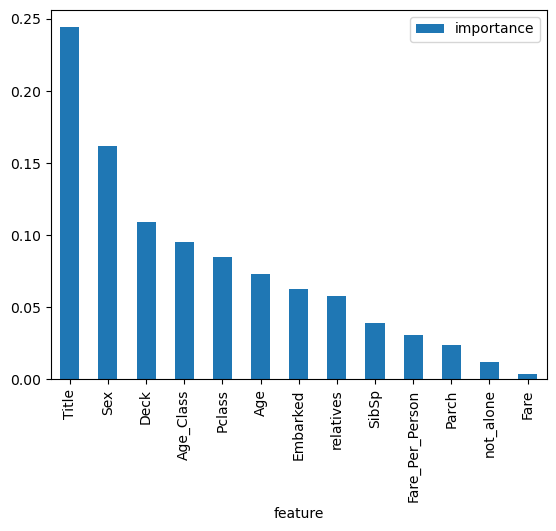

In [81]:
importances.plot.bar()

### Conclusion:
not_alone and Parch doesn’t play a significant role in our random forest classifiers prediction process. Because of that I will drop them from the dataset and train the classifier again. We could also remove more or less features, but this would need a more detailed investigation of the features effect on our model. But I think it’s just fine to remove only Alone and Parch.